In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/layoffs-data-2022/layoffs_data.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Wrangling

In [3]:
df = pd.read_csv('/kaggle/input/layoffs-data-2022/layoffs_data.csv')
df.head()

,Company,Location,Industry,Date,Source,Funds_Raised,Stage,Date_Added,Country,Laid_Off_Count,Percentage,List_of_Employees_Laid_Off
0,Autobooks,Detroit,Finance,2022-12-10,https://www.crainsdetroit.com/technology/finte...,97.0,Series C,2022-12-11 03:36:27,United States,NaN,NaN,Unknown
1,PharmEasy,Mumbai,Healthcare,2022-12-10,https://inc42.com/buzz/pharmeasy-lays-off-more...,1600.0,Unknown,2022-12-11 06:25:36,India,NaN,NaN,Unknown
2,Playtika,Tel Aviv,Consumer,2022-12-09,https://en.globes.co.il/en/article-playtika-to...,NaN,IPO,2022-12-11 06:01:30,Israel,600.0,0.15,Unknown
3,Alice,Sao Paulo,Healthcare,2022-12-09,https://startups.com.br/demissoes/alice-faz-no...,174.0,Series C,2022-12-11 03:31:04,Brazil,113.0,0.16,Unknown
4,Primer,London,Finance,2022-12-09,https://techcrunch.com/2022/12/09/primer-the-u...,73.0,Series B,2022-12-09 16:37:23,United Kingdom,85.0,0.33,Unknown


In [4]:
df.shape

(1792, 12)

In [5]:
df.columns

Index(['Company', 'Location', 'Industry', 'Date', 'Source', 'Funds_Raised',
       'Stage', 'Date_Added', 'Country', 'Laid_Off_Count', 'Percentage',
       'List_of_Employees_Laid_Off'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1792 entries, 0 to 1791
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     1792 non-null   object 
 1   Location                    1792 non-null   object 
 2   Industry                    1792 non-null   object 
 3   Date                        1791 non-null   object 
 4   Source                      1792 non-null   object 
 5   Funds_Raised                1659 non-null   float64
 6   Stage                       1792 non-null   object 
 7   Date_Added                  1792 non-null   object 
 8   Country                     1792 non-null   object 
 9   Laid_Off_Count              1258 non-null   float64
 10  Percentage                  1210 non-null   float64
 11  List_of_Employees_Laid_Off  1792 non-null   object 
dtypes: float64(3), object(9)
memory usage: 168.1+ KB


In [7]:
df.dtypes

Company                        object
Location                       object
Industry                       object
Date                           object
Source                         object
Funds_Raised                  float64
Stage                          object
Date_Added                     object
Country                        object
Laid_Off_Count                float64
Percentage                    float64
List_of_Employees_Laid_Off     object
dtype: object

In [8]:
df.describe()

,Funds_Raised,Laid_Off_Count,Percentage
count,1659.000000,1258.000000,1210.000000
mean,856.681914,195.442766,0.274316
std,6287.605817,561.129473,0.265507
min,0.000000,3.000000,0.000000
25%,45.000000,31.000000,0.100000
50%,137.000000,70.000000,0.180000
75%,393.000000,150.000000,0.320000
max,121900.000000,11000.000000,1.000000


In [9]:
df.isnull().sum()

Company                         0
Location                        0
Industry                        0
Date                            1
Source                          0
Funds_Raised                  133
Stage                           0
Date_Added                      0
Country                         0
Laid_Off_Count                534
Percentage                    582
List_of_Employees_Laid_Off      0
dtype: int64

In [10]:
df.Industry.unique()

array(['Finance', 'Healthcare', 'Consumer', 'Other', 'Crypto', 'Product',
       'Food', 'HR', 'Transportation', 'Marketing', 'Security',
       'Infrastructure', 'Education', 'Real Estate', 'Legal', 'Retail',
       'Media', 'Unknown', 'Travel', 'Fitness', 'Support', 'Data',
       'Recruiting', 'Energy', 'Sales', 'Logistics', 'Aerospace',
       'Construction'], dtype=object)

In [11]:
df.Company.nunique()

1494

In [12]:
df.Stage.unique()

array(['Series C', 'Unknown', 'IPO', 'Series B', 'Series H', 'Series A',
       'Series F', 'Series D', 'Private Equity', 'Series E', 'Acquired',
       'Series J', 'Seed', 'Series G', 'Series I'], dtype=object)

In [13]:
df.Country.unique()

array(['United States', 'India', 'Israel', 'Brazil', 'United Kingdom',
       'Australia', 'Singapore', 'Indonesia', 'Argentina', 'Mexico',
       'Nigeria', 'Netherlands', 'Germany', 'Canada', 'Switzerland',
       'Egypt', 'Sweden', 'Ireland', 'Kenya', 'Luxembourg', 'China',
       'Spain', 'Estonia', 'Greece', 'Poland', 'Seychelles', 'Norway',
       'Belgium', 'Denmark', 'Hong Kong', 'New Zealand', 'Malaysia',
       'Hungary', 'Vietnam', 'Austria', 'Thailand', 'Romania',
       'Lithuania', 'Chile', 'Senegal', 'Pakistan',
       'United Arab Emirates', 'Colombia', 'Finland', 'Peru', 'Bahrain',
       'Turkey', 'Russia', 'Uruguay', 'Bulgaria', 'France', 'Portugal',
       'South Africa', 'Czech Republic', 'Myanmar'], dtype=object)

In [14]:
df.duplicated().sum()

0

In [15]:
df.query('Percentage == 1.00')

,Company,Location,Industry,Date,Source,Funds_Raised,Stage,Date_Added,Country,Laid_Off_Count,Percentage,List_of_Employees_Laid_Off
6,Brodmann17,Tel Aviv,Other,2022-12-09,https://techcrunch.com/2022/12/09/computer-vis...,25.0,Series A,2022-12-11 06:17:56,Israel,NaN,1.0,Unknown
7,Digital Surge,Brisbane,Crypto,2022-12-09,https://www.9news.com.au/technology/australian...,NaN,Unknown,2022-12-11 06:09:24,Australia,NaN,1.0,Unknown
60,Lora DiCarlo,Bend,Consumer,2022-12-02,https://techcrunch.com/2022/12/02/looks-like-s...,9.0,Unknown,2022-12-04 23:09:00,United States,NaN,1.0,Unknown
86,Bitfront,SF Bay Area,Crypto,2022-11-29,https://www.reuters.com/technology/crypto-exch...,NaN,Unknown,2022-11-30 05:54:28,United States,NaN,1.0,Unknown
100,BlockFi,New York City,Crypto,2022-11-28,https://decrypt.co/115744/crypto-lender-blockf...,1000.0,Series E,2022-11-30 06:05:58,United States,NaN,1.0,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
1774,Service,Los Angeles,Travel,2020-03-20,https://techcrunch.com/2020/03/16/travel-savin...,5.0,Seed,2020-04-01 21:17:10,United States,NaN,1.0,Unknown
1777,Ejento,SF Bay Area,Recruiting,2020-03-19,https://layoffs.fyi/list/ejento/,NaN,Unknown,2020-03-28 20:52:49,United States,84.0,1.0,Unknown
1781,Popin,New York City,Fitness,2020-03-19,https://www.businessinsider.com/fitness-app-po...,13.0,Unknown,2020-04-06 23:47:12,United States,NaN,1.0,Unknown
1785,Help.com,Austin,Support,2020-03-16,LinkedIn,6.0,Seed,2020-04-16 06:36:06,United States,16.0,1.0,Unknown


### Issues
1. Drop Unwanted Columns
2. Change Columns Names to Small Letters
3. Change Date column data type to datetime
4. Extract (year-month-day) From Date Column to Create New Columns
5. Filling Missing values with zeros
6. Change Laid_Off_Count column data type to integer

****

## Cleaning Data

In [16]:
#i used function to first drop unwanted columns
#second to make columns labels lower case 

def new_columns():
    df.drop(['List_of_Employees_Laid_Off','Source','Date_Added'], axis=1, inplace=True)
    df.rename(columns=lambda x: x.strip().lower(),inplace=True)
    return new_columns
new_columns()
df.head()

,company,location,industry,date,funds_raised,stage,country,laid_off_count,percentage
0,Autobooks,Detroit,Finance,2022-12-10,97.0,Series C,United States,NaN,NaN
1,PharmEasy,Mumbai,Healthcare,2022-12-10,1600.0,Unknown,India,NaN,NaN
2,Playtika,Tel Aviv,Consumer,2022-12-09,NaN,IPO,Israel,600.0,0.15
3,Alice,Sao Paulo,Healthcare,2022-12-09,174.0,Series C,Brazil,113.0,0.16
4,Primer,London,Finance,2022-12-09,73.0,Series B,United Kingdom,85.0,0.33


In [17]:
#function for first change date colum data type to datetime
#then extract year, month, day to create new columns
def created_columns():
    df['date'] = pd.to_datetime(df['date'])
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day_name()
    df['year'] = df['date'].dt.year
    return created_columns
created_columns()
df.dtypes

company                   object
location                  object
industry                  object
date              datetime64[ns]
funds_raised             float64
stage                     object
country                   object
laid_off_count           float64
percentage               float64
month                    float64
day                       object
year                     float64
dtype: object

In [18]:
df.head()

,company,location,industry,date,funds_raised,stage,country,laid_off_count,percentage,month,day,year
0,Autobooks,Detroit,Finance,2022-12-10,97.0,Series C,United States,NaN,NaN,12.0,Saturday,2022.0
1,PharmEasy,Mumbai,Healthcare,2022-12-10,1600.0,Unknown,India,NaN,NaN,12.0,Saturday,2022.0
2,Playtika,Tel Aviv,Consumer,2022-12-09,NaN,IPO,Israel,600.0,0.15,12.0,Friday,2022.0
3,Alice,Sao Paulo,Healthcare,2022-12-09,174.0,Series C,Brazil,113.0,0.16,12.0,Friday,2022.0
4,Primer,London,Finance,2022-12-09,73.0,Series B,United Kingdom,85.0,0.33,12.0,Friday,2022.0


In [19]:
df.fillna(0, inplace=True)
df.isnull().any()

company           False
location          False
industry          False
date              False
funds_raised      False
stage             False
country           False
laid_off_count    False
percentage        False
month             False
day               False
year              False
dtype: bool

In [20]:
#create function to change data types of laid_off_count, year, month columns to integer
def new_datatypes():
    columns = ['laid_off_count', 'year', 'month']
    for c in columns:
        df[c] = df[c].astype(int)
    return new_datatypes
new_datatypes()
df.dtypes

company            object
location           object
industry           object
date               object
funds_raised      float64
stage              object
country            object
laid_off_count      int64
percentage        float64
month               int64
day                object
year                int64
dtype: object

****

## Exploratory Data Analysis

In [21]:
df.head()

,company,location,industry,date,funds_raised,stage,country,laid_off_count,percentage,month,day,year
0,Autobooks,Detroit,Finance,2022-12-10 00:00:00,97.0,Series C,United States,0,0.00,12,Saturday,2022
1,PharmEasy,Mumbai,Healthcare,2022-12-10 00:00:00,1600.0,Unknown,India,0,0.00,12,Saturday,2022
2,Playtika,Tel Aviv,Consumer,2022-12-09 00:00:00,0.0,IPO,Israel,600,0.15,12,Friday,2022
3,Alice,Sao Paulo,Healthcare,2022-12-09 00:00:00,174.0,Series C,Brazil,113,0.16,12,Friday,2022
4,Primer,London,Finance,2022-12-09 00:00:00,73.0,Series B,United Kingdom,85,0.33,12,Friday,2022


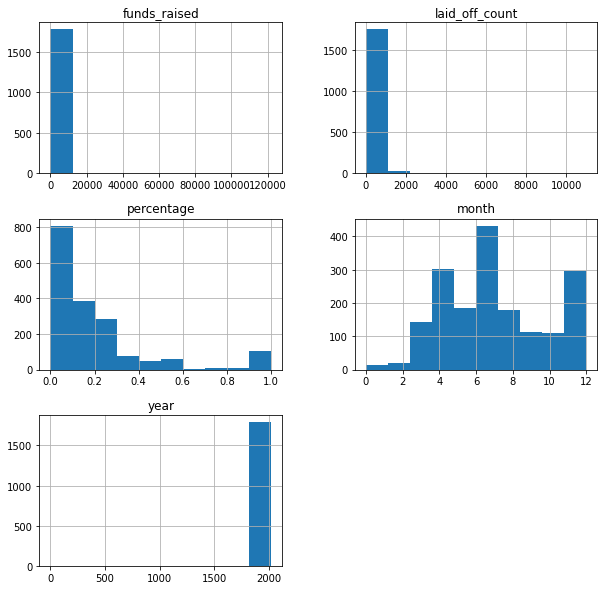

In [22]:
df.hist(figsize=(10,10));

In [23]:
#find layoffs for each year
df.groupby('year')['laid_off_count'].sum()

year
0            0
2020     80968
2021     15023
2022    149876
Name: laid_off_count, dtype: int64

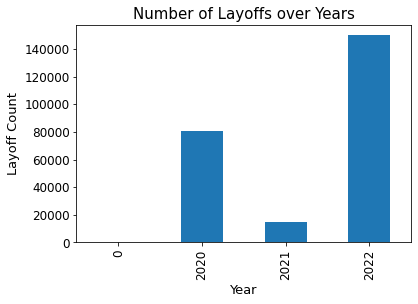

In [24]:
#plotting it with bar chart
df.groupby('year')['laid_off_count'].sum().plot(kind='bar',fontsize=12)
plt.title('Number of Layoffs over Years',size=15)
plt.xlabel('Year',size=13)
plt.ylabel('Layoff Count',size=13);

> **In 2020, almost 81k employees were laid off. In 2021, the situation has become better with 15k laid off but unfortunately in 2022, the situation got worse than in 2020 with over 147k laid off.**

In [25]:
#layoff for each country
df.groupby('country')['laid_off_count'].sum().sort_values(ascending=False)

country
United States           161353
India                    31236
Brazil                    8110
Singapore                 5801
Canada                    5199
Netherlands               5070
United Kingdom            4870
China                     4430
Germany                   4113
Indonesia                 2961
Israel                    2938
Sweden                    2014
Australia                 1215
United Arab Emirates       995
Hong Kong                  730
Nigeria                    491
Austria                    470
Russia                     400
Kenya                      349
Argentina                  323
Senegal                    300
Mexico                     270
Estonia                    267
Finland                    250
Denmark                    240
Ireland                    230
Myanmar                    200
Norway                     140
Romania                    140
Bulgaria                   120
Portugal                   115
Malaysia                   100


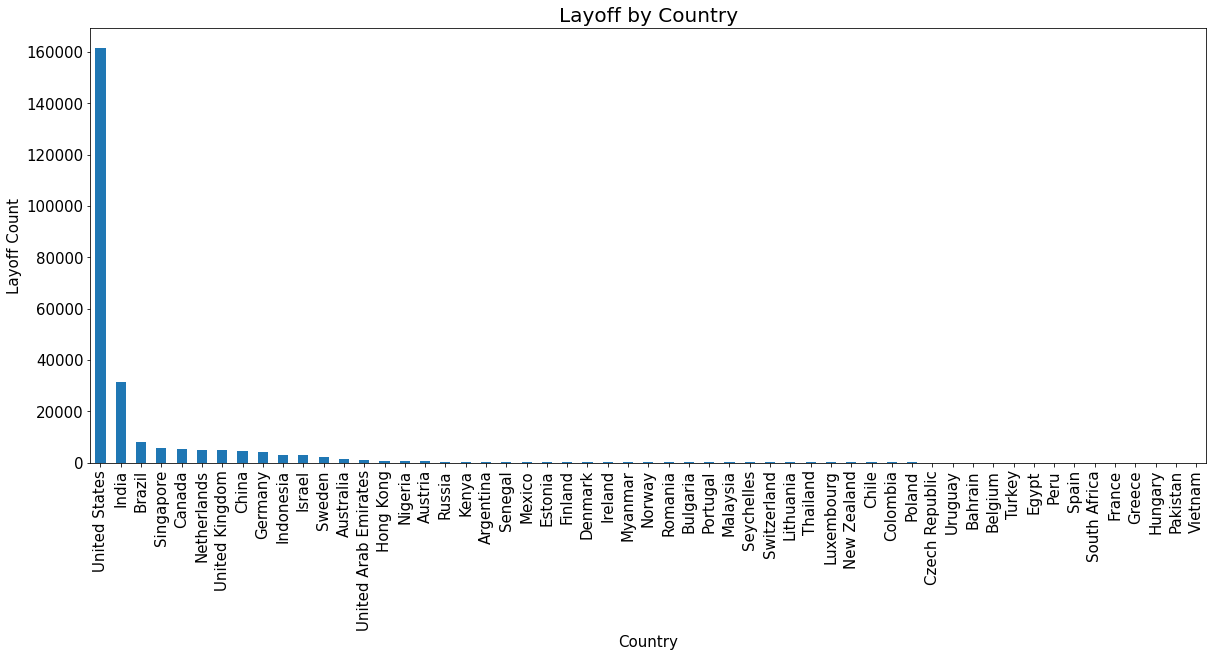

In [26]:
#plotting it with bar chart
df.groupby('country')['laid_off_count'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(20,8),fontsize=15)
plt.title('Layoff by Country',size=20)
plt.xlabel('Country',size=15)
plt.ylabel('Layoff Count',size=15);

In [27]:
#calculate the proportion of layoff in the united states to the total layoff.
proportion_of_US_layoff = round(df.groupby('country')['laid_off_count'].sum().sort_values(ascending=False)[0]/df.laid_off_count.sum(),3)
proportion_of_US_layoff

0.656

In [28]:
#calculate the proportion of layoff in india to the total layoff.
proportion_of_India_layoff = round(df.groupby('country')['laid_off_count'].sum().sort_values(ascending=False)[1]/df.laid_off_count.sum(),3)
proportion_of_India_layoff

0.127

> **Here we can see that the United States has the most layoff by far with (65.9%) of the total layoffs, followed by India with (12.7%).**

> **The United States and India, having (78.6%) of all the layoffs, which leaves only (21.4%) shared by the other countries.**

In [29]:
#find layoff by industry
df.groupby('industry')['laid_off_count'].sum().sort_values(ascending=False)

industry
Transportation    29425
Consumer          29194
Retail            27601
Finance           21067
Food              19656
Real Estate       16364
Travel            15476
Healthcare        12115
Education         10743
Fitness            8688
Crypto             8060
Marketing          6443
Other              6407
Infrastructure     5358
Security           3993
Sales              3833
Construction       3820
Media              3112
Recruiting         2775
Logistics          2731
Data               2583
HR                 1540
Support            1440
Product            1062
Energy              802
Aerospace           661
Legal               620
Unknown             298
Name: laid_off_count, dtype: int64

In [30]:
#check th Unknown in industry column
df.query('industry == "Unknown"')

,company,location,industry,date,funds_raised,stage,country,laid_off_count,percentage,month,day,year
51,DataRails,Tel Aviv,Unknown,2022-12-05 00:00:00,103.0,Series B,Israel,30,0.18,12,Monday,2022
81,Motional,Boston,Unknown,2022-11-30 00:00:00,0.0,Unknown,United States,0,0.00,11,Wednesday,2022
92,Proton.ai,Boston,Unknown,2022-11-29 00:00:00,20.0,Series A,United States,0,0.00,11,Tuesday,2022
196,InfluxData,SF Bay Area,Unknown,2022-11-10 00:00:00,119.0,Series D,United States,65,0.27,11,Thursday,2022
210,AvantStay,Los Angeles,Unknown,2022-11-09 00:00:00,686.0,Private Equity,United States,144,0.22,11,Wednesday,2022
241,Exodus,Nebraska City,Unknown,2022-11-04 00:00:00,60.0,Unknown,United States,59,0.22,11,Friday,2022


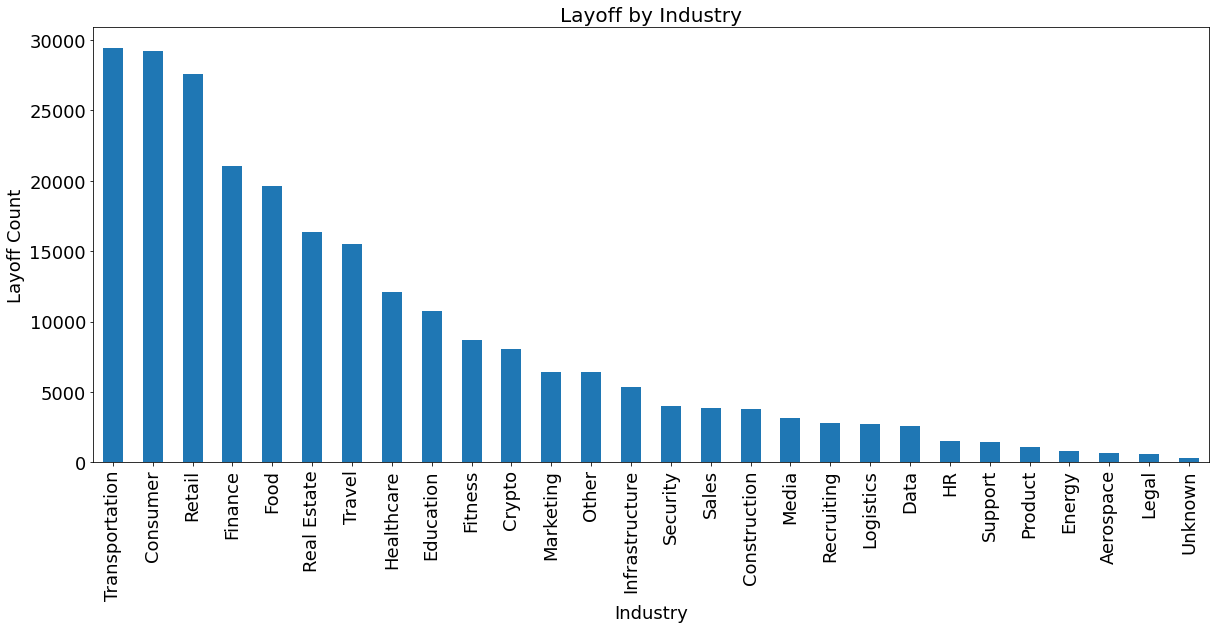

In [31]:
#plotting it wiht bar chart
df.groupby('industry')['laid_off_count'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(20,8),fontsize=18)
plt.title('Layoff by Industry',size=20)
plt.xlabel('Industry',size=18)
plt.ylabel('Layoff Count',size=18);

> **If we look at the numbers of layoffs in every industry, we will find that Transportation followed by consumer, retail, and finance have layoffs between 20k to 30k.**

> **Food followed by real estate, travel, healthcare and education have layoffs between 10k to 20k.**

> **Legal has the least layoffs followed by aerospace, product and energy.**

In [32]:
#find average layoff for each industry
df.groupby('industry')['percentage'].mean().sort_values(ascending=False).round(3)

industry
Aerospace         0.377
Product           0.250
Crypto            0.244
Recruiting        0.242
Travel            0.237
Fitness           0.232
Legal             0.229
Real Estate       0.225
Education         0.217
Construction      0.210
Retail            0.207
Food              0.206
Healthcare        0.196
Infrastructure    0.190
Consumer          0.177
Finance           0.176
HR                0.162
Transportation    0.160
Media             0.160
Other             0.157
Support           0.153
Logistics         0.153
Marketing         0.151
Unknown           0.148
Security          0.130
Data              0.126
Energy            0.123
Sales             0.055
Name: percentage, dtype: float64

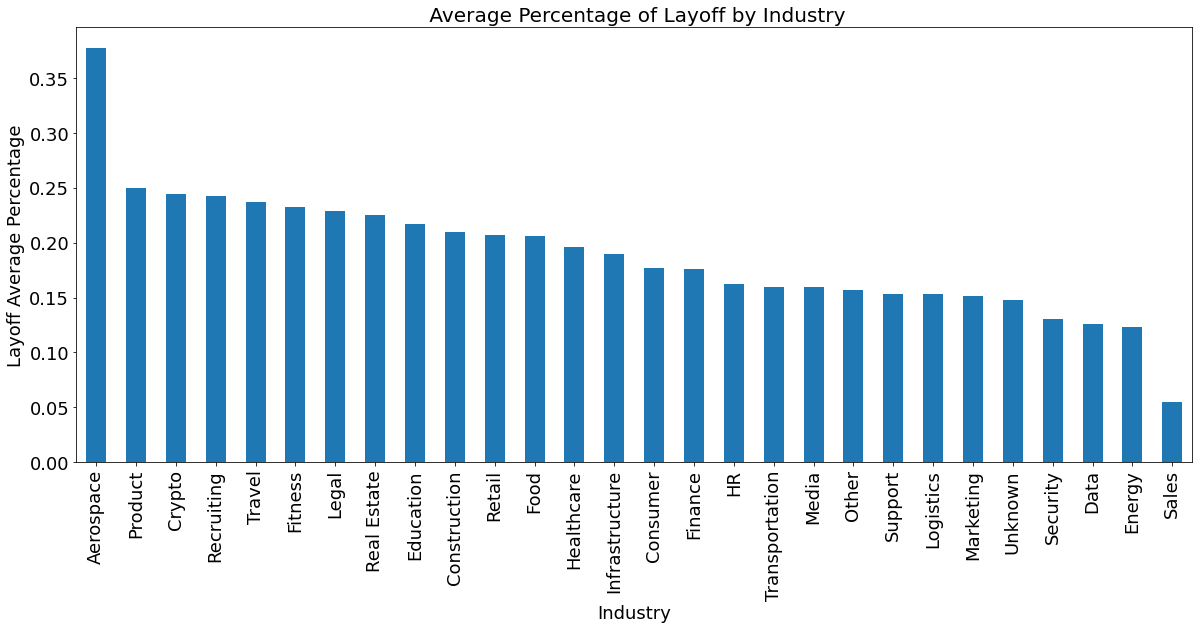

In [33]:
#plot it with bar chart
df.groupby('industry')['percentage'].mean().sort_values(ascending=False).round(3).plot(kind='bar',figsize=(20,8),fontsize=18)
plt.title(' Average Percentage of Layoff by Industry',size=20)
plt.xlabel('Industry',size=18)
plt.ylabel('Layoff Average Percentage',size=18);

> **If we look at the average percentage of layoffs in every industry, we can see that Aerospace has the most average percentage of layoffs (37.7%), followed by Product (25.5%).**

> **Sales has the least layoff percentage (5.5%).**

> **If we looked from the employee side, Transportation followed by consumer, retail, and finance were the most affected industries by covid-19. Legal followed by aerospace, product, and energy were the least affected industries by covid-19.**

> **But if we looked from the Industries owner's side, Aerospace followed by Product, were the most affected industries by covid-19. And Sales was the least affected industry by covid-19.**

In [34]:
#find layoff by stage
df.groupby('stage')['laid_off_count'].sum().sort_values(ascending=False)

stage
IPO               97745
Unknown           35360
Acquired          18699
Series D          17049
Series C          16681
Series B          13074
Series E           9945
Series F           8836
Series H           6389
Private Equity     6276
Series A           4910
Series G           3406
Series J           3370
Series I           2645
Seed               1482
Name: laid_off_count, dtype: int64

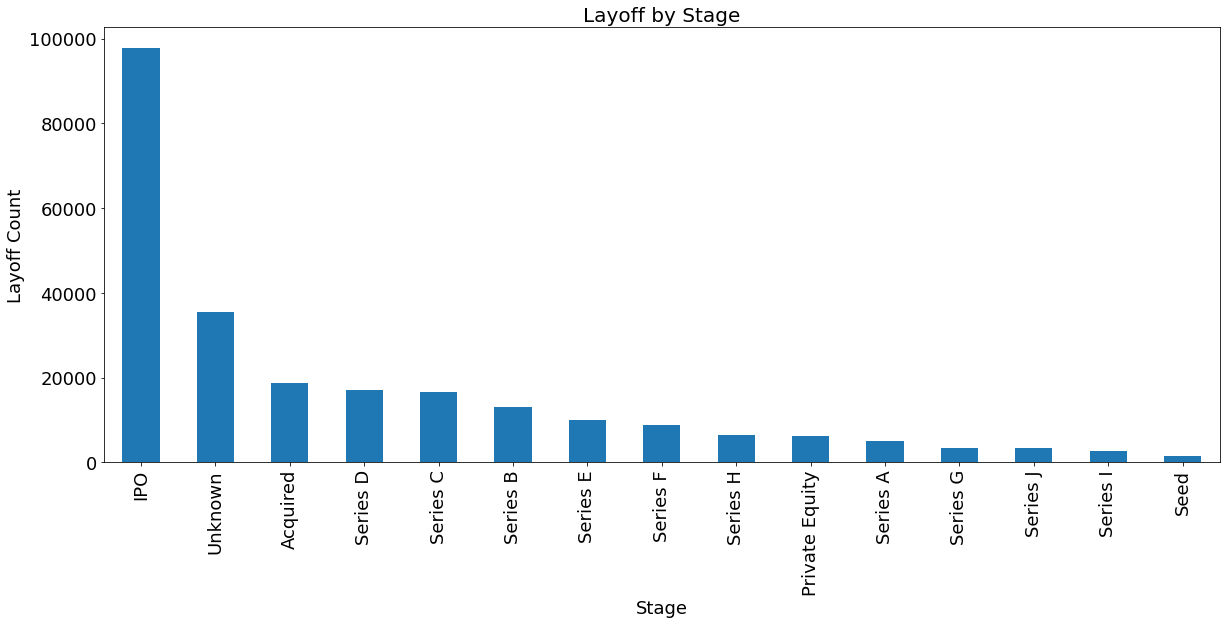

In [35]:
#plottig it with bar chart
df.groupby('stage')['laid_off_count'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(20,8),fontsize=18)
plt.title('Layoff by Stage',size=20)
plt.xlabel('Stage',size=18)
plt.ylabel('Layoff Count',size=18);


In [36]:
#calculate the proportion of layoff in IPO stage to the total layoff.
proportion_of_IPO_layoff = round(df.groupby('stage')['laid_off_count'].sum().sort_values(ascending=False)[0]/df.laid_off_count.sum(),3)
proportion_of_IPO_layoff

0.398

In [37]:
#calculate the proportion of layoff in Seed stage to the total layoff.
proportion_of_Seed_layoff = round(df.groupby('stage')['laid_off_count'].sum().sort_values(ascending=False)[14]/df.laid_off_count.sum(),3)
proportion_of_Seed_layoff

0.006

> **IPO stage companies have the most layoffs with (39.8%).**

> **Seed stage companies have the least layoffs with (0.6%)**

In [38]:
#layoff by month for year 2020
df20 = df.query('year == 2020')
df1 = df20.groupby('month')['laid_off_count'].sum().to_frame()
df1.rename(columns={'laid_off_count':'layoff_2020'},inplace=True)
df1

,layoff_2020
month,
3,9628
4,26710
5,25804
6,7627
7,7112
8,1969
9,609
10,450
11,207


In [39]:
#layoff by month for 2021
df21 = df.query('year == 2021')
df2 = df21.groupby('month')['laid_off_count'].sum().to_frame()
df2.rename(columns={'laid_off_count':'layoff_2021'},inplace=True)
df2

,layoff_2021
month,
1,6013
2,868
3,47
4,261
5,0
6,2434
7,80
8,1867
9,161


In [40]:
#layoff by month for 2022
df22 = df.query('year == 2022')
df3 = df22.groupby('month')['laid_off_count'].sum().to_frame()
df3.rename(columns={'laid_off_count':'layoff_2022'},inplace=True)
df3

,layoff_2022
month,
1,510
2,3625
3,5694
4,4064
5,12535
6,17584
7,16223
8,13095
9,5881


In [41]:
#combined them in one data frame
df_combined = pd.concat([df3,df2,df1], axis=1)
df_combined

,layoff_2022,layoff_2021,layoff_2020
month,,,
1,510,6013,NaN
2,3625,868,NaN
3,5694,47,9628.0
4,4064,261,26710.0
5,12535,0,25804.0
6,17584,2434,7627.0
7,16223,80,7112.0
8,13095,1867,1969.0
9,5881,161,609.0


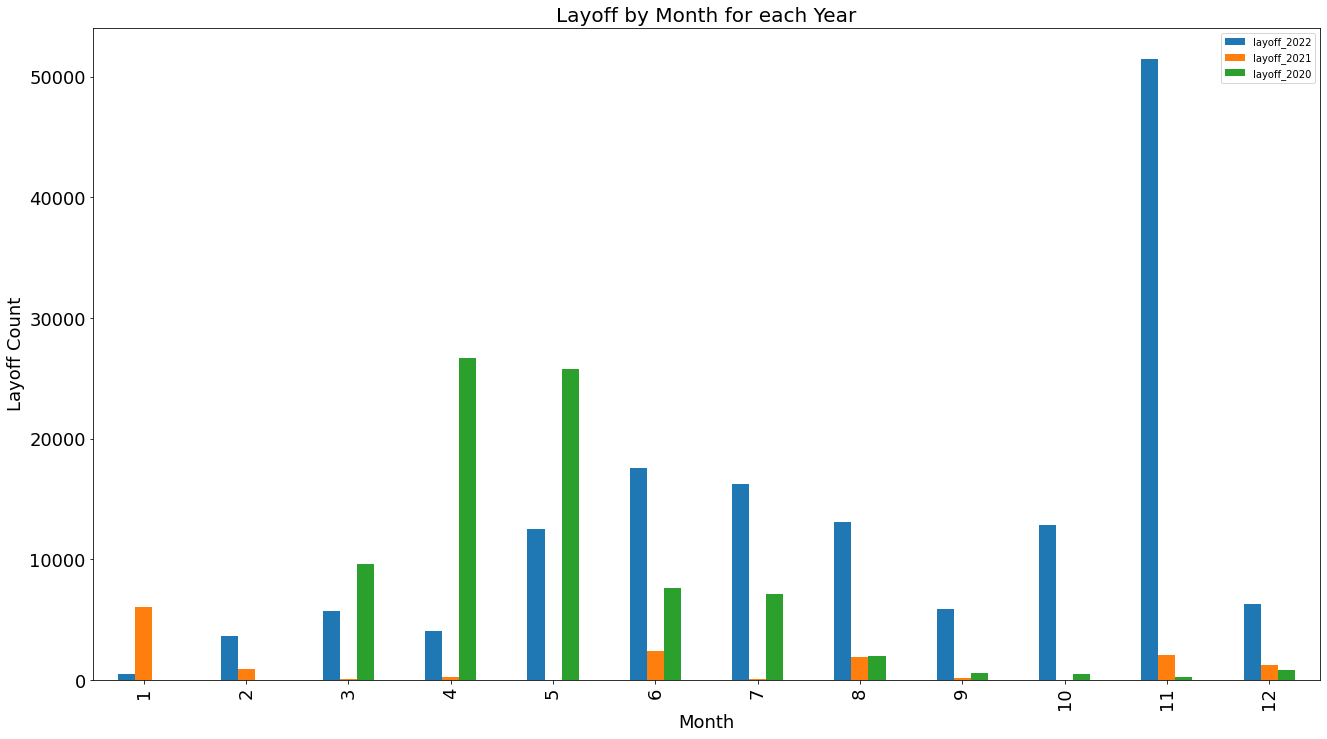

In [42]:
#plotting it with bar chart
df_combined.plot(kind='bar',figsize=(22,12),fontsize=18)
plt.title('Layoff by Month for each Year',size=20)
plt.xlabel('Month',size=18)
plt.ylabel('Layoff Count',size=18);

> **In 2020, starting from March when the covid-19 hit the world, the most layoff month was Abril with (26710) layoff, followed by May then started to decrease, until in December layoffs starts to increase again.**

> **In 2021, the layoffs were the least between the years 2020,2021,2022. January has the most layoffs (6013), followed by June and November.**

> **In 2022, November has the worst layoff, not only in that year but in all the 3 years with (51300) layoffs.**

In [43]:
#funds raised by industry
df.groupby('industry')['funds_raised'].sum().sort_values(ascending=False)

industry
Media             501983.8000
Transportation    258592.7400
Consumer          117853.3000
Real Estate        96858.5000
Finance            88740.7800
Food               79880.9755
Retail             49195.1000
Healthcare         39859.0000
Travel             28571.5000
Other              23975.0000
Data               17185.6000
Education          16981.8000
Marketing          15264.7000
Security           14299.0000
Crypto             13573.0000
Fitness            11069.6000
Logistics           7950.0000
Infrastructure      5878.0000
Construction        5394.0000
Product             5271.2000
Energy              4052.0000
HR                  3958.7000
Support             3713.6000
Sales               3584.4000
Aerospace           3477.0000
Recruiting          1944.0000
Legal               1140.0000
Unknown              988.0000
Name: funds_raised, dtype: float64

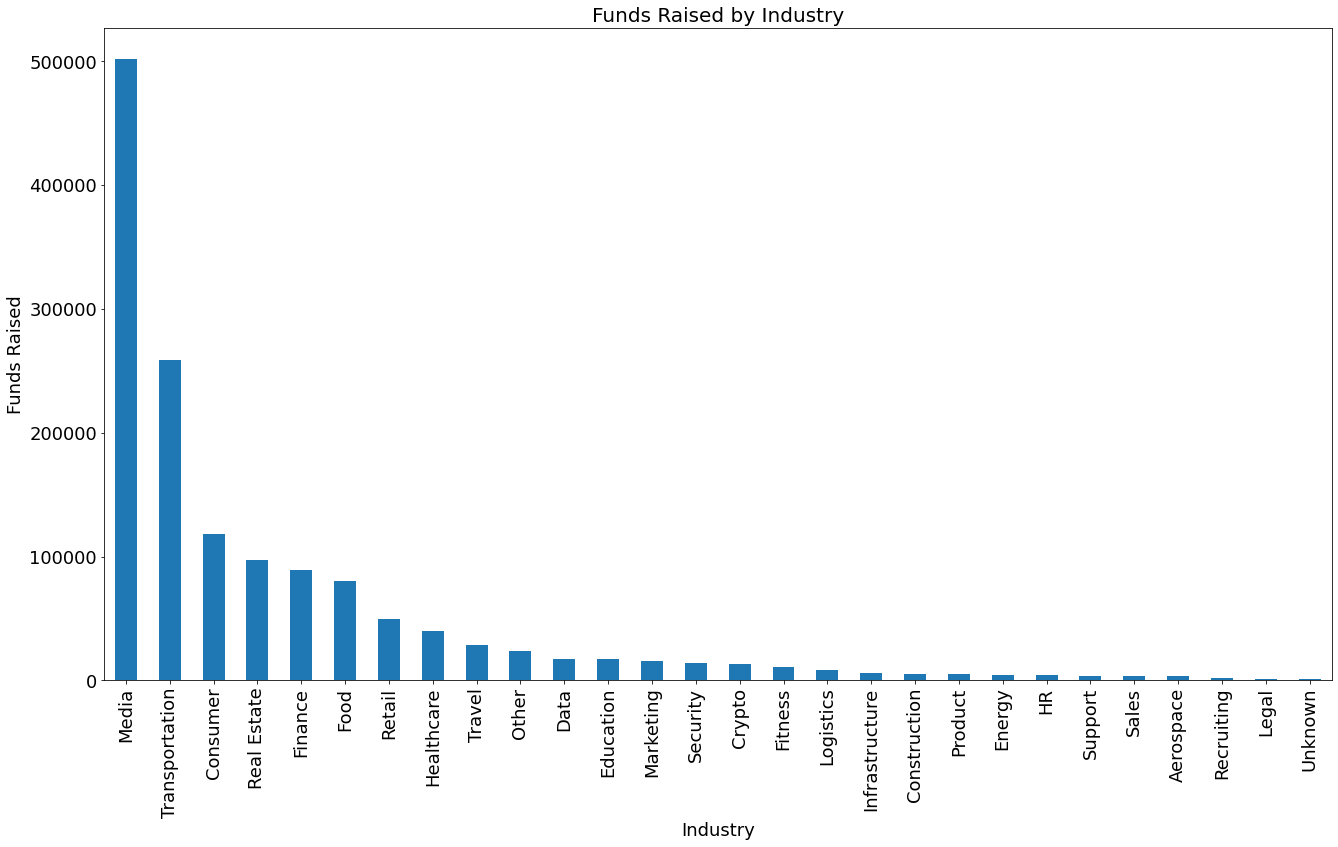

In [44]:
#plotting it with bar chart
df.groupby('industry')['funds_raised'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(22,12),fontsize=18)
plt.title('Funds Raised by Industry',size=20)
plt.xlabel('Industry',size=18)
plt.ylabel('Funds Raised',size=18);

> **The Media industry has the most funds raised, followed by Transportation and Consumer.**

> **The legal industry has the least funds raised.**

In [45]:
#funds raised by stage
df.groupby('stage')['funds_raised'].sum().sort_values(ascending=False)

stage
IPO               881270.9000
Unknown           126848.6000
Series H           89691.0000
Series D           63537.6000
Series E           49623.0000
Series C           48684.8000
Series F           41846.8000
Private Equity     24902.5400
Series B           24539.5800
Acquired           18388.4000
Series J           18242.0000
Series I           15178.0000
Series G           13291.0000
Series A            4928.4000
Seed                 262.6755
Name: funds_raised, dtype: float64

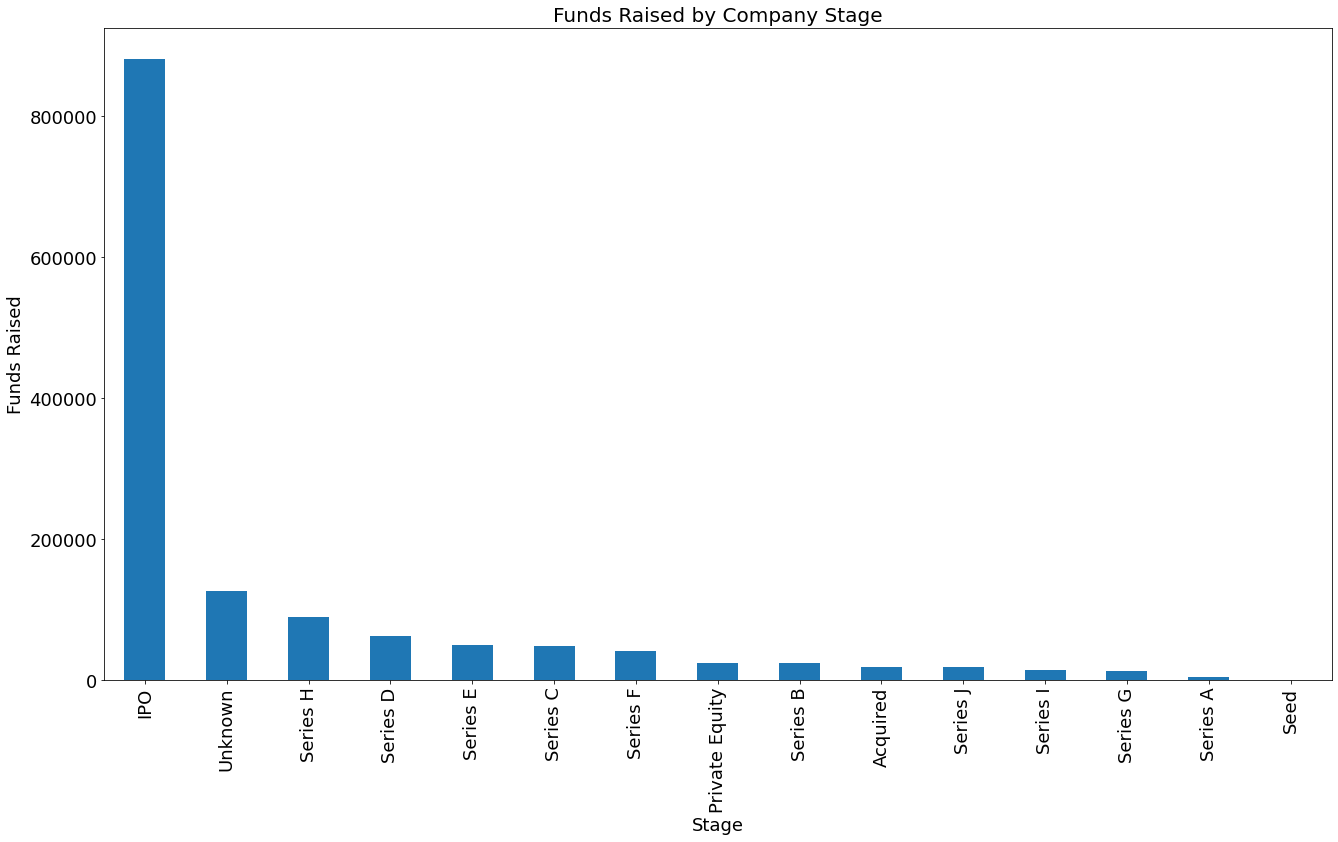

In [46]:
#plotting it with bar chart
df.groupby('stage')['funds_raised'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(22,12),fontsize=18)
plt.title('Funds Raised by Company Stage',size=20)
plt.xlabel('Stage',size=18)
plt.ylabel('Funds Raised',size=18);

> **The IPO stage companies have by far, the most funds raised, and the Seed stage has the least funds raised.**

In [47]:
#top 10 funds raised companies
df.groupby('company')['funds_raised'].sum().nlargest(10)

company
Netflix          487600.0
Uber             123500.0
WeWork            43500.0
Bytedance         26200.0
Meta              26000.0
Tesla             20200.0
WeWork            19500.0
Twitter           18600.0
Sea               17200.0
Delivery Hero     16600.0
Name: funds_raised, dtype: float64

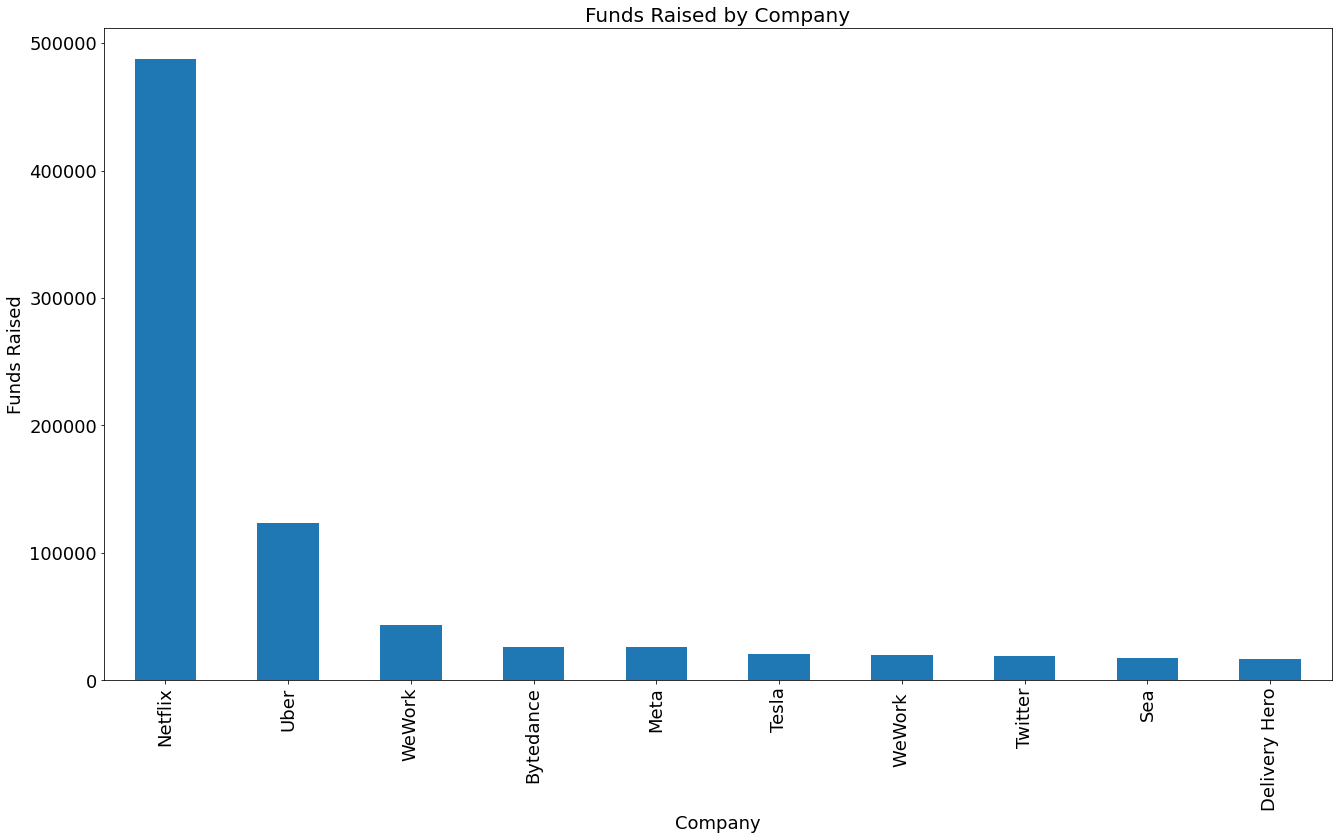

In [49]:
#plotting it with bar chart
df.groupby('company')['funds_raised'].sum().nlargest(10).plot(kind='bar',figsize=(22,12),fontsize=18)
plt.title('Funds Raised by Company',size=20)
plt.xlabel('Company',size=18)
plt.ylabel('Funds Raised',size=18);

> **Netflix has the largest funds raised with (487600), followed by Uber with (123500).**

In [50]:
#index for top 10 largest layoff dates 
ind = df['laid_off_count'].nlargest(10).index

In [51]:
#10 largest layoff dates
df.loc[ind]

,company,location,industry,date,funds_raised,stage,country,laid_off_count,percentage,month,day,year
207,Meta,SF Bay Area,Consumer,2022-11-09 00:00:00,26000.0,IPO,United States,11000,0.13,11,Wednesday,2022
142,Amazon,Seattle,Retail,2022-11-16 00:00:00,108.0,IPO,United States,10000,0.03,11,Wednesday,2022
1215,Booking.com,Amsterdam,Travel,2020-07-30 00:00:00,0.0,Acquired,Netherlands,4375,0.25,7,Thursday,2020
143,Cisco,SF Bay Area,Infrastructure,2022-11-16 00:00:00,2.0,IPO,United States,4100,0.05,11,Wednesday,2022
237,Twitter,SF Bay Area,Consumer,2022-11-04 00:00:00,12900.0,IPO,United States,3700,0.50,11,Friday,2022
1364,Uber,SF Bay Area,Transportation,2020-05-06 00:00:00,24700.0,IPO,United States,3700,0.14,5,Wednesday,2020
1095,Better.com,New York City,Real Estate,2022-03-08 00:00:00,905.0,Unknown,United States,3000,0.33,3,Tuesday,2022
1319,Uber,SF Bay Area,Transportation,2020-05-18 00:00:00,24700.0,IPO,United States,3000,0.13,5,Monday,2020
1108,Peloton,New York City,Fitness,2022-02-08 00:00:00,1900.0,IPO,United States,2800,0.20,2,Tuesday,2022
1519,Groupon,Chicago,Retail,2020-04-13 00:00:00,1400.0,IPO,United States,2800,0.44,4,Monday,2020


> **From the largest 10 layoffs happened, we can see they are all companies in the United States except the third place is in the Netherlands.**

> **Also, we can see that almost all of the companies are in the IPO stage except the third place in the Acquired stage and the seventh place unknown stage.**

> **Five of the ten companies are in SF Bay Area in the United States.**

> **Four of the ten happend in November 2022.**

> **Meta is the most layoff company with a layoff count of (11000) which represent (13%) of the company employees. Followed by Amazon with a layoff count of (10000) which represent (3%) of the company employees.**

> **Twitter is the fifth most layoff company with a layoff count of (3700), but it represents (50%) of the company employees.**

**Some companies have more than layoffs happened, so now I will show the total layoff by companies.**

In [52]:
#layoff by company
df.groupby('company')['laid_off_count'].sum().nlargest(10)

company
Meta           11000
Amazon         10000
Uber            7585
Booking.com     4601
Cisco           4100
Peloton         4084
Carvana         4000
Better.com      3900
Bytedance       3750
Twitter         3700
Name: laid_off_count, dtype: int64

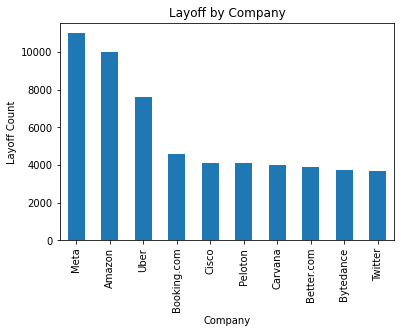

In [53]:
#plotting it with bar chart
df.groupby('company')['laid_off_count'].sum().nlargest(10).plot(kind='bar')
plt.title('Layoff by Company')
plt.xlabel('Company')
plt.ylabel('Layoff Count');

> **Meta still the most layoff company with (11000), followed by Amazon with (10000).**

> **But now we can see that Uber is in third place with (7585), which has more than layoffs dates.**

> **Followed by Booking-com with (4601), Cisco with (4100), etc.**

In [54]:
#filter the data frame to get the number of the companies that went bankrupt
df_bankrupt = df.query('percentage == 1')
df_bankrupt

,company,location,industry,date,funds_raised,stage,country,laid_off_count,percentage,month,day,year
6,Brodmann17,Tel Aviv,Other,2022-12-09 00:00:00,25.0,Series A,Israel,0,1.0,12,Friday,2022
7,Digital Surge,Brisbane,Crypto,2022-12-09 00:00:00,0.0,Unknown,Australia,0,1.0,12,Friday,2022
60,Lora DiCarlo,Bend,Consumer,2022-12-02 00:00:00,9.0,Unknown,United States,0,1.0,12,Friday,2022
86,Bitfront,SF Bay Area,Crypto,2022-11-29 00:00:00,0.0,Unknown,United States,0,1.0,11,Tuesday,2022
100,BlockFi,New York City,Crypto,2022-11-28 00:00:00,1000.0,Series E,United States,0,1.0,11,Monday,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
1774,Service,Los Angeles,Travel,2020-03-20 00:00:00,5.0,Seed,United States,0,1.0,3,Friday,2020
1777,Ejento,SF Bay Area,Recruiting,2020-03-19 00:00:00,0.0,Unknown,United States,84,1.0,3,Thursday,2020
1781,Popin,New York City,Fitness,2020-03-19 00:00:00,13.0,Unknown,United States,0,1.0,3,Thursday,2020
1785,Help.com,Austin,Support,2020-03-16 00:00:00,6.0,Seed,United States,16,1.0,3,Monday,2020


In [55]:
#companies that went bankrupt
df_bankrupt.company.unique()

array(['Brodmann17', 'Digital Surge', 'Lora DiCarlo', 'Bitfront',
       'BlockFi', 'Assure', 'GoodGood', 'GloriFi', 'Kite',
       'Deliveroo Australia', 'Protocol', 'Nirvana Money', 'Wavely',
       'Faze Medicines', 'Planetly', 'Fifth Season', 'GoNuts', 'Argo AI',
       'Nuri', 'Flux Systems', 'Qin1', 'Playdots', 'Pastel', 'Pesto',
       'Kitty Hawk', 'Propzy', 'CommonBond', 'Lido Learning',
       'Simple Feast', 'The Wing', 'Reali', 'ShopX', 'Edmodo', 'Pollen',
       'Haus', 'Perceptive Automata', 'Metigy', 'Yabonza', 'Soluto',
       'Airlift', 'Butler Hospitality', 'WanderJaunt', 'Crejo.Fun',
       'Gavelytics', 'Volt Bank', 'Kune', 'SuperLearn', 'SummerBio',
       'JetClosing', 'The Grommet', 'Kaodim', 'Udayy', 'BeyondMinds',
       'Subspace', 'SEND', 'Halcyon Health', 'Ahead', 'Fast', 'Ozy Media',
       'Katerra', 'Madefire', 'Limelight', 'Hubba', 'Pocketmath',
       'Aura Financial', 'Simple', 'Bridge Connector', 'Rubica', 'Quibi',
       'HubHaus', 'Awok', 'Lumina Ne

In [56]:
#number of bankrupt companies
df_bankrupt.shape[0]

102

In [57]:
#bankrupt companies by year
df_bankrupt.year.value_counts()

2022    58
2020    36
2021     8
Name: year, dtype: int64

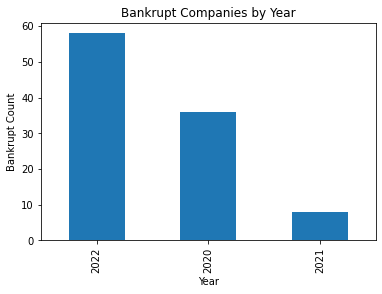

In [58]:
#plotting it with bar chart
df_bankrupt.year.value_counts().plot(kind='bar')
plt.title('Bankrupt Companies by Year')
plt.xlabel('Year')
plt.ylabel('Bankrupt Count');

In [59]:
#bankrupt companies by country
df_bankrupt.country.value_counts()

United States           65
India                    7
Australia                6
Israel                   3
United Kingdom           3
Singapore                3
Indonesia                3
Canada                   2
Germany                  2
Vietnam                  2
United Arab Emirates     2
Denmark                  1
Pakistan                 1
Kenya                    1
Brazil                   1
Name: country, dtype: int64

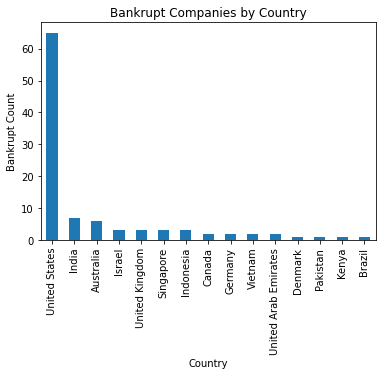

In [60]:
#plotting it with bar chart
df_bankrupt.country.value_counts().plot(kind='bar')
plt.title('Bankrupt Companies by Country')
plt.xlabel('Country')
plt.ylabel('Bankrupt Count');

In [61]:
df_bankrupt.laid_off_count.value_counts()

0       61
100      3
65       2
120      2
6        2
250      2
13       2
4        1
500      1
21       1
10       1
221      1
137      1
17       1
87       1
20       1
154      1
84       1
669      1
2434     1
45       1
44       1
300      1
40       1
101      1
170      1
85       1
1000     1
75       1
140      1
150      1
173      1
200      1
60       1
16       1
Name: laid_off_count, dtype: int64

In [62]:
#bankrupt companies by stage
df_bankrupt.stage.value_counts()

Unknown           28
Seed              21
Series B          19
Series A          12
Acquired          11
Series C           5
Series E           3
IPO                1
Series D           1
Private Equity     1
Name: stage, dtype: int64

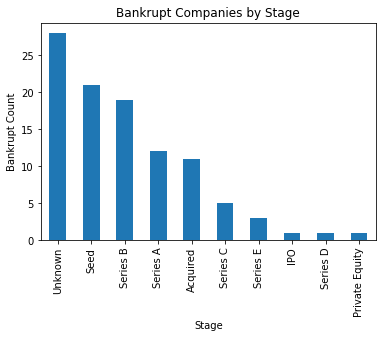

In [63]:
#plotting it with bar chart
df_bankrupt.stage.value_counts().plot(kind='bar')
plt.title('Bankrupt Companies by Stage')
plt.xlabel('Stage')
plt.ylabel('Bankrupt Count');

In [64]:
#bankrupt companies by industry
df_bankrupt.industry.value_counts()

Retail            12
Food              11
Finance           10
Education          8
Real Estate        6
Travel             5
Media              5
Healthcare         5
Crypto             5
Other              4
Consumer           4
Transportation     4
Marketing          4
Product            3
Infrastructure     3
Recruiting         2
Fitness            2
Support            2
Logistics          1
Legal              1
Data               1
Construction       1
HR                 1
Security           1
Aerospace          1
Name: industry, dtype: int64

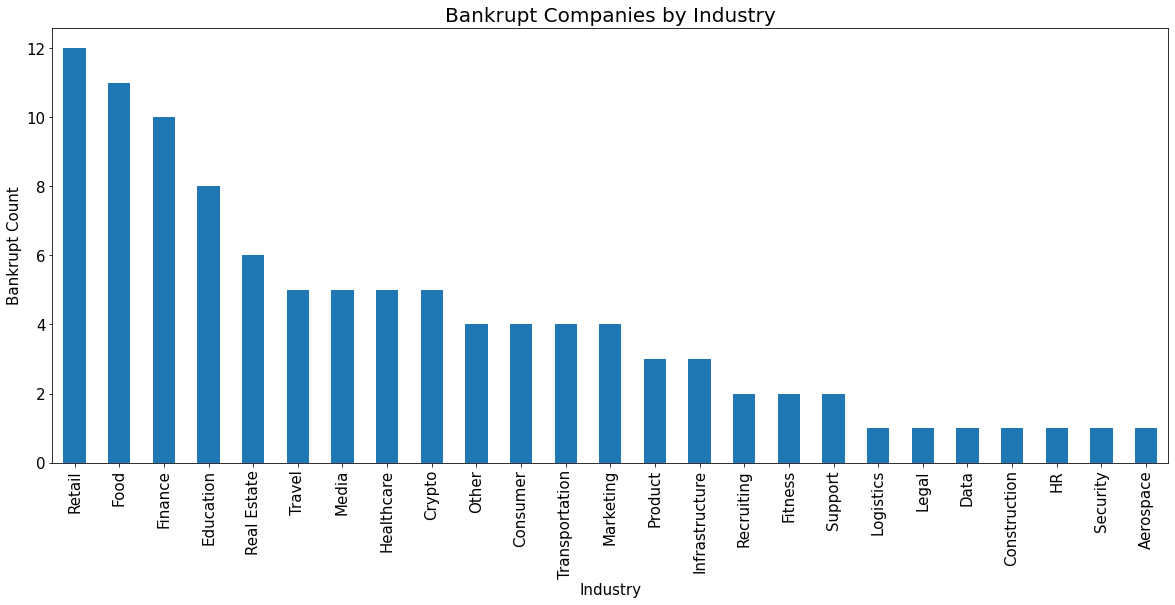

In [65]:
#plotting it with bar chart
df_bankrupt.industry.value_counts().plot(kind='bar',figsize=(20,8),fontsize=15)
plt.title('Bankrupt Companies by Industry',size=20)
plt.xlabel('Industry',size=15)
plt.ylabel('Bankrupt Count',size=15);

**Bankrupt Companies Insights**
> **We have 100 companies that had been bankrupt over 3 years. In 2020 (36) companies, in 2021 (8) companies, and in 2022 (56) companies.**

> **We can not see how many employees had been laid off because (60) of (100) companies, the data about laid off counts were null values filled with zero.**

> **In the United States, over 3 years, (65) companies had been bankrupt, followed by India (7) companies.**

> **Most of these companies' stages are unknown. The seed stage is the most known bankrupt stage with (21) companies, followed by Series B (19).**

> **The most bankrupt companies are in the Retail industry (12), followed by the Food industry (11), and the Finance industry (10).**

In [66]:
#create a data frame with only United States companies
df_US = df.query('country == "United States"')

In [67]:
#number of locations
df_US.location.nunique()

78

In [68]:
#largest 20 location 
df_US.groupby('location')['laid_off_count'].sum().nlargest(20)

location
SF Bay Area        80267
New York City      22043
Seattle            16051
Boston              7430
Los Angeles         5838
Chicago             5289
Phoenix             4113
Philadelphia        2340
Miami               2119
Austin              1892
Atlanta             1461
Detroit             1180
San Luis Obispo     1100
Stamford             964
Columbus             933
Washington D.C.      867
San Diego            815
Salt Lake City       808
Pittsburgh           513
Las Vegas            405
Name: laid_off_count, dtype: int64

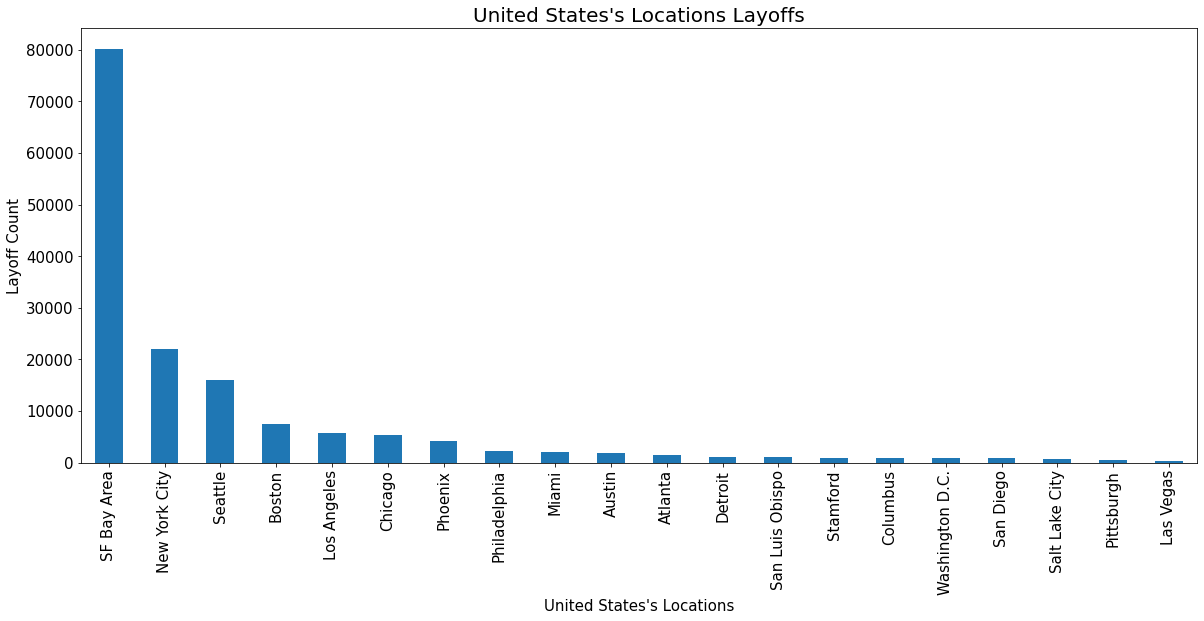

In [69]:
#plotting it with bar chart
df_US.groupby('location')['laid_off_count'].sum().nlargest(20).plot(kind='bar',figsize=(20,8),fontsize=15)
plt.title("United States's Locations Layoffs",size=20)
plt.xlabel("United States's Locations",size=15)
plt.ylabel("Layoff Count",size=15);

> **We know that the largest layoffs were in the United States, so I want to separate it and show the top 10 location that has the largest layoffs.**

> **SF Bay Area by far has the largest layoffs with (80267), followed by New York City with (22043) layoffs, and Seattle with (16051) layoffs.**